In [1]:
import os
import json
import numpy as np
import pandas as pd

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

from utils import *

pd.set_option('display.max_columns', None)

with open('config.json') as f:
    config = json.load(f)

In [2]:
# Cache directory path, it determines where downloaded data will be stored
manifest_path = os.path.join(config['cache_dir'], "manifest.json")
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

In [3]:
VI_structure_acronyms = [x for x in cache.get_structure_acronyms() if x is not np.nan and 'VI' in x]
print('Visual cortex areas: ' + ', '.join(VI_structure_acronyms))

Visual cortex areas: VISrl, VIS, VISp, VISpm, VISam, VISal, VISl, VISmma, VISmmp, VISli


In [4]:
sessions = cache.get_session_table()
pd.set_option('display.max_rows', 10)
display(sessions)

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"
...,...,...,...,...,...,...,...,...,...,...
835479236,2019-10-03T00:00:00Z,813701562,functional_connectivity,121.0,M,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,582,1857,5,"[LP, DG, CA1, VISmmp, nan, SCiw, SCig, SCop, S..."
839068429,2019-10-03T00:00:00Z,817060751,functional_connectivity,129.0,F,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,742,2298,6,"[APN, LP, MB, DG, CA1, VISam, nan, VISpm, ProS..."
839557629,2019-10-03T00:00:00Z,821469666,functional_connectivity,115.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,450,1853,5,"[APN, NOT, MB, DG, CA1, VISam, nan, VISpm, LGd..."


## Filter sessions data

In [5]:
filter_dict = config['filter_dict']
ecephys_structure_acronym = filter_dict['ecephys_structure_acronyms']
filtered_sessions = sessions[
    np.logical_and.reduce([np.array([True if s in x else False for x in sessions[k]]) for k, s in filter_dict.items()])
]
pd.set_option('display.max_rows', None)
display(filtered_sessions)

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
746083955,2019-10-03T00:00:00Z,726170935,brain_observatory_1.1,98.0,F,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,582,2216,6,"[VPM, TH, LGd, CA3, CA2, CA1, VISal, nan, grey..."
760345702,2019-10-03T00:00:00Z,739783171,brain_observatory_1.1,103.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,501,1862,5,"[MB, TH, PP, PIL, DG, CA3, CA1, VISal, nan, gr..."
773418906,2019-10-03T00:00:00Z,757329624,brain_observatory_1.1,124.0,F,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,546,2232,6,"[PPT, NOT, SUB, ProS, CA1, VISam, nan, APN, DG..."
797828357,2019-10-03T00:00:00Z,776061251,brain_observatory_1.1,107.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,611,2232,6,"[PPT, MB, APN, NOT, HPF, ProS, CA1, VISam, nan..."


In [6]:
session_id = int(input('Select session ID: '))

Select session ID: 721123822


In [7]:
session = cache.get_session_data(session_id)

## Get units in area of interest

In [8]:
# units in a session after quality filter
units = session.units
VI_units = units.loc[[i for i, x in units.iterrows() if x['ecephys_structure_acronym'] in VI_structure_acronyms]]
print(f'Total number of units in visual cortex: {len(VI_units):d}')

Total number of units in visual cortex: 214


In [9]:
probes = cache.get_probes()
probes = probes[probes['ecephys_session_id'] == session_id]

for i, x in probes.iterrows():
    print(f'probe id: {i:d}')
    areas = [s for s in x['ecephys_structure_acronyms'] if s in VI_structure_acronyms]
    n_units = [np.count_nonzero(VI_units['ecephys_structure_acronym'] == s) for s in areas]
    print('structure: ' + ', '.join(areas))
    print('number of units: ' + ', '.join(map(str, n_units)) + '\n')

probe id: 760213137
structure: VISam
number of units: 39

probe id: 760213142
structure: VIS
number of units: 24

probe id: 760213145
structure: VISp
number of units: 41

probe id: 760213147
structure: VISl
number of units: 27

probe id: 760213150
structure: VISal
number of units: 37

probe id: 760213153
structure: VISrl
number of units: 46



In [10]:
sel_units = VI_units[VI_units['ecephys_structure_acronym'] == ecephys_structure_acronym]

In [11]:
# # Spike time data is missing for units filtered out in a session
# units = cache.get_units(amplitude_cutoff_maximum = np.inf,
#                         presence_ratio_minimum = -np.inf,
#                         isi_violations_maximum = np.inf)
# units = units[units['ecephys_session_id'] == session_id]

# VI_units_all = units.loc[[i for i, x in units.iterrows() if x['ecephys_structure_acronym'] in VI_structure_acronyms]]
# len(VI_units_all)

### Find center channel

In [12]:
# units center
ccf_coords = ['anterior_posterior_ccf_coordinate', 'dorsal_ventral_ccf_coordinate', 'left_right_ccf_coordinate']
units_coord = sel_units[ccf_coords].values
units_coord_mean = units_coord.mean(axis=0)
center_unit_id = sel_units.index[np.argmin(np.sum((units_coord - units_coord_mean) ** 2, axis=1))]

channel_index = sel_units.loc[center_unit_id, 'probe_channel_number']
probe_id = sel_units.loc[center_unit_id, 'probe_id']

channel = session.channels[(session.channels.probe_channel_number == channel_index) & 
                           (session.channels.probe_id == probe_id)]
center_unit_channel_id = int(channel.index[0])

print('Channel of the unit near the center of units')
display(channel)

Channel of the unit near the center of units


,filtering,probe_channel_number,probe_horizontal_position,probe_id,probe_vertical_position,structure_acronym,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate
id,,,,,,,,,,,
850245985,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,234,59,760213145,2360,VISp,385.0,VISp,8650.0,1130.0,8035.0


In [13]:
# channels center
channels_coord = session.channels[ccf_coords].values
center_channel_id = int(session.channels.index[np.argmin(np.sum((channels_coord - units_coord_mean) ** 2, axis=1))])

print('Chennel near the center of units')
display(session.channels.loc[[center_channel_id]])

Chennel near the center of units


,filtering,probe_channel_number,probe_horizontal_position,probe_id,probe_vertical_position,structure_acronym,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate
id,,,,,,,,,,,
850245983,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,233,11,760213145,2340,VISp,385.0,VISp,8646.0,1141.0,8035.0


In [14]:
# channels center
channels_coord = session.channels[ccf_coords].values
center_channel_id = int(session.channels.index[np.argmin(np.sum((channels_coord - units_coord_mean) ** 2, axis=1))])

print('Chennel near the center of units')
display(session.channels.loc[[center_channel_id]])

Chennel near the center of units


,filtering,probe_channel_number,probe_horizontal_position,probe_id,probe_vertical_position,structure_acronym,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate
id,,,,,,,,,,,
850245983,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,233,11,760213145,2340,VISp,385.0,VISp,8646.0,1141.0,8035.0


In [15]:
channels = session.channels
channels = channels.loc[channels['structure_acronym'] == ecephys_structure_acronym]
probe_id = channels.probe_id.unique()
print('Probes and channels in %s:' % ecephys_structure_acronym)
for i in probe_id:
    print(f'probe id {i:d}: {sum(channels.probe_id == i):d} channels')

Probes and channels in VISp:
probe id 760213145: 81 channels


In [16]:
probe_id = int(input('Select probe: ') if probe_id.size > 1 else probe_id[0])

In [17]:
fs = probes.loc[probe_id, 'lfp_sampling_rate']

## Save probe information

In [18]:
output_dir = config['output_dir']
session_dir = os.path.join(output_dir, f'session_{session_id:d}')

if not os.path.isdir(session_dir):
    os.makedirs(session_dir)

info = {
    'session_id': session_id,
    'ecephys_structure_acronym': ecephys_structure_acronym,
    'probe_id': probe_id,
    'center_channel_id': center_channel_id,
    'center_unit_channel_id': center_unit_channel_id,
    'fs': fs,
    'parameters': {}, # to be added in later analyses
}

info_file = os.path.join(output_dir, f'session_{session_id:d}_{ecephys_structure_acronym:s}.json')
with open(info_file, 'w') as f:
    json.dump(info, f, indent=4)

In [20]:
fig_disp = figure_display_function(config, session_id=session_id, ecephys_structure_acronym=ecephys_structure_acronym)

## Average channels in groups and save

In [21]:
probe_dir = os.path.join(session_dir, f'probe_{probe_id:d}')
if not os.path.isdir(probe_dir):
    os.makedirs(probe_dir)

filepath = os.path.join(probe_dir, f'{ecephys_structure_acronym:s}_lfp_channel_groups.nc')
channel_groups_exists = os.path.isfile(filepath)

E:\Users\lenovo\anaconda3\envs\allensdk\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Users\lenovo\anaconda3\envs\allensdk\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


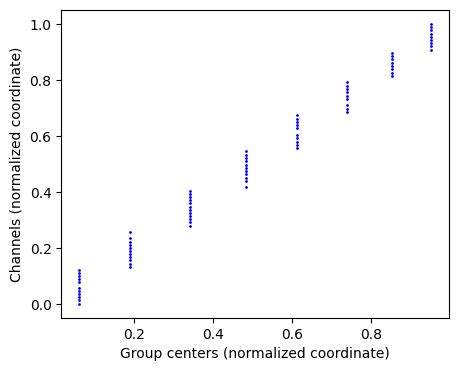

In [22]:
import xarray as xr
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import manifold, cluster

channel_coord = channels[ccf_coords].values

# reduce dimension to one
method = 'ltsa' # 'standard' 'hessian' 'ltsa' 'modified'
lle = manifold.LocallyLinearEmbedding(n_components=1, n_neighbors=6, method=method)
probe_coord = lle.fit_transform(channel_coord) # 1D coordinate of channels

# find number of clusters in the channels
probe_coord = sk.preprocessing.MinMaxScaler().fit_transform(probe_coord)
kmeans = cluster.KMeans(2, n_init='auto')
jumps = kmeans.fit_predict(np.diff(np.sort(probe_coord, axis=0), axis=0))
n_group = np.sum(jumps == np.argmax(kmeans.cluster_centers_.ravel())) + 1

# divide channels into groups
kmeans = cluster.KMeans(n_group, n_init='auto')
channel_group = kmeans.fit_predict(probe_coord)
group_centers = kmeans.cluster_centers_.ravel()
group_sort_id = np.argsort(group_centers)

# visualize channel groups
plt.figure(figsize=(5, 4))
for g, x in zip(channel_group, probe_coord.ravel()):
    plt.plot(group_centers[g], x, 'b.', markersize=2)
plt.xlabel('Group centers (normalized coordinate)')
plt.ylabel('Channels (normalized coordinate)')
fig_disp('channel_group_centers')

In [23]:
if not channel_groups_exists:
    # Load LFP given probe
    lfp_array = session.get_lfp(probe_id)
    lfp_array = lfp_array.sel(channel=np.unique(lfp_array.channel.sel(channel=channels.index, method='nearest')))

    # Compile groups of channels
    channels_group_id = np.zeros(channel_group.size, dtype=int)
    channels_in_groups = {}
    group_ccf_coord = np.zeros((n_group, 3))
    for i in range(n_group):
        idx = channel_group == group_sort_id[i]
        channels_group_id[idx] = i
        group_ccf_coord[i, :] = channels[idx][ccf_coords].values.mean(axis=0)
        channels_in_groups[i] = channels[idx].index.values
    channel_group_map = pd.DataFrame(channels_group_id, columns=['group_id'], index=channels.index)
    channel_group_map[ccf_coords] = group_ccf_coord[channels_group_id]
    for g, c in channels_in_groups.items():
        channels_in_groups[g] = np.array([x for x in c if x in lfp_array.channel])

    # Create group average LFP dataset
    channel_group_ids = pd.Index(np.arange(n_group), name='group_id')
    group_lfp = [lfp_array.sel(channel=channels_in_groups[i]).mean(dim='channel') for i in channel_group_ids]
    group_lfp = xr.concat(group_lfp, dim=channel_group_ids).to_dataset(name='LFP')
    print(group_lfp)

In [24]:
if not channel_groups_exists:
    group_lfp.to_netcdf(filepath) # save downsampled channels
    channel_group_map.to_csv(filepath.replace('.nc', '.csv'))

## Save LFP of particular channel

In [25]:
# channel_id = center_channel_id
# lfp = session.get_lfp(probe_id).sel(channel=channel_id, method='nearest')
# filepath = os.path.join(probe_dir, f'lfp_channel_{channel_id:d}.nc')
# lfp.to_netcdf(filepath)